In [2]:
# Some usual imports here
import csv as csv 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

UNINSURED_DATA_FILE = 'the-number-of-estimated-eligible-uninsured-people-for-outreach-targeting.csv';
OUTPATIENT_DATA_FILE = '';
INPATIENT_DATA_FILE = 'Medicare_Provider_Charge_Inpatient_DRGALL_FY2015.csv';

inpatient_charges = pd.read_csv(INPATIENT_DATA_FILE);


In [23]:
inpatient_charges.columns
inpatient_charges.shape

(201876, 12)

In [4]:
inpatient_charges.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,201876.000000,201876.000000,201876.000000,2.018760e+05,201876.000000,201876.000000
mean,255739.198325,47050.984094,36.820959,5.500866e+04,13219.565072,11213.909857
std,151064.388882,27804.910256,51.525284,6.582696e+04,13835.710286,12310.955873
min,10001.000000,1040.000000,11.000000,1.715000e+03,2419.490000,659.260000
25%,110079.000000,25301.000000,15.000000,2.173497e+04,6260.835000,4982.402500
50%,240106.000000,43725.000000,22.000000,3.605010e+04,9185.390000,7680.885000
75%,380027.000000,71901.000000,39.000000,6.347406e+04,14655.012500,12442.505000
max,670100.000000,99801.000000,3990.000000,2.794184e+06,449486.110000,417977.350000


In [5]:
treatments = inpatient_charges.groupby(['DRG Definition']).groups.keys()


In [6]:

charges_grouped = inpatient_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'mean', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })

In [7]:
charges_grouped.columns
#plt.bar(treatments['DRG Definition'], treatments['Average Total Charges'])

Index(['Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

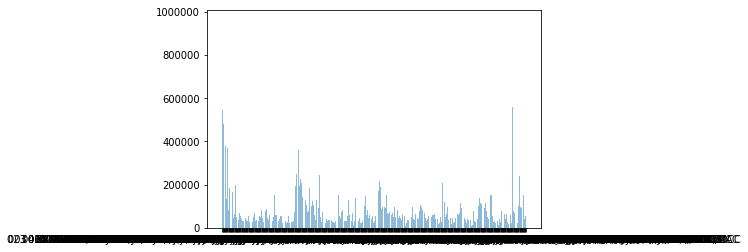

In [8]:
plt.bar(charges_grouped.index, charges_grouped['Average Covered Charges'], align='center', alpha=0.5)
plt.show()

## Too hard to see all 583 DRG definitions, but shows max to be about 600,000, majority sub 200000. 

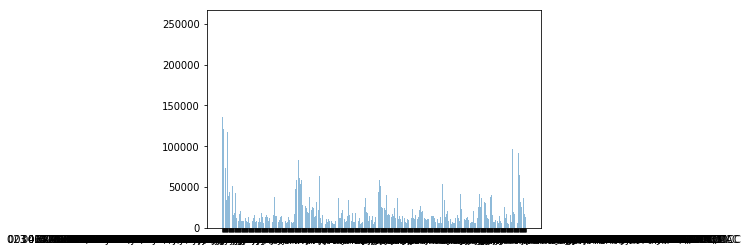

In [9]:
plt.bar(charges_grouped.index, charges_grouped['Average Total Payments'], align='center', alpha=0.5)
plt.show()

## interesting to see that average total payments are much less, with a maximum of about 150,000, but majority
## less than 25,000

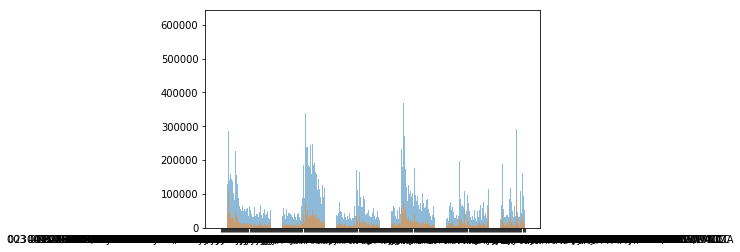

In [20]:
## lets look at one particular medical type accross different states
az_charges = inpatient_charges[inpatient_charges['Provider State'] == 'AZ']
az_charges_grpd = az_charges.groupby(['DRG Definition']).agg({ 'Total Discharges':'sum', 'Average Covered Charges': 'mean', 'Average Total Payments':'mean','Average Medicare Payments': 'mean' })
az_charges_grpd

plt.bar(az_charges_grpd.index, az_charges_grpd['Average Covered Charges'], align='center', alpha=0.5)
plt.bar(az_charges_grpd.index, az_charges_grpd['Average Total Payments'], align='center', alpha=0.5)
plt.show()

In [21]:
az_charges_grpd


,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
DRG Definition,,,,
001 - HEART TRANSPLANT OR IMPLANT OF HEART ASSIST SYSTEM W MCC,28,382051.000000,194081.390000,167511.960000
"003 - ECMO OR TRACH W MV >96 HRS OR PDX EXC FACE, MOUTH & NECK W MAJ O.R.",140,533862.377143,127373.451429,116762.901429
"004 - TRACH W MV 96+ HRS OR PDX EXC FACE, MOUTH & NECK W/O MAJ O.R.",94,265375.568333,70582.268333,59833.295000
005 - LIVER TRANSPLANT W MCC OR INTESTINAL TRANSPLANT,11,252068.730000,120999.180000,44443.730000
007 - LUNG TRANSPLANT,28,611775.540000,85538.750000,72281.290000
"011 - TRACHEOSTOMY FOR FACE,MOUTH & NECK DIAGNOSES W MCC",12,129831.750000,51646.500000,33715.580000
"012 - TRACHEOSTOMY FOR FACE,MOUTH & NECK DIAGNOSES W CC",13,130505.460000,44689.000000,26721.080000
014 - ALLOGENEIC BONE MARROW TRANSPLANT,13,285682.150000,111195.150000,93683.850000
016 - AUTOLOGOUS BONE MARROW TRANSPLANT W CC/MCC,42,141498.980000,45649.390000,36179.740000
